In [1]:
import copy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, roc_curve, auc, log_loss
from kmodes.kmodes import KModes

In [2]:
df = pd.read_csv('basics500.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.shape

(4920, 6)

In [5]:
df.dtypes

earned      object
headline    object
hours       object
jobs        object
rate        object
skills      object
dtype: object

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(3646, 6)

In [8]:
type(df.skills.iloc[7])

float

In [9]:
for i in df.skills.index:
    if type(df.skills.loc[i]) == float:
        df.skills.loc[i] = '[]'

In [10]:
df = df.dropna()

In [11]:
df.shape

(3319, 6)

In [12]:
df = df.drop(['earned'], axis=1)

In [13]:
df['rate'] = df['rate'].map(lambda string: float(''.join([c for c in string if c.isdigit()]))/100)

In [14]:
df['hours'] = df['hours'].map(lambda string: int(''.join([c for c in string if c.isdigit()])))

In [15]:
df['jobs'] = df['jobs'].map(lambda string: int(''.join([c for c in string if c.isdigit()])))

In [16]:
df['skills'] = df['skills'].map(lambda string: string.replace('[', ""))

In [17]:
df['skills'] = df['skills'].map(lambda string: string.replace(']', ""))

In [18]:
df['skills'] = df['skills'].map(lambda string: string.replace("'", ""))

In [19]:
df['skills'] = df['skills'].map(lambda string: string.replace('"', ''))

In [20]:
df['skills'] = df['skills'].map(lambda string: string.split(", "))

In [21]:
for i in df.skills.index:
    if df.skills.loc[i] == ['']:
        df.skills.loc[i] = []

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
df.shape

(3319, 5)

In [25]:
y = df.rate
y = y.values

Text(0.5,1,'Rates')

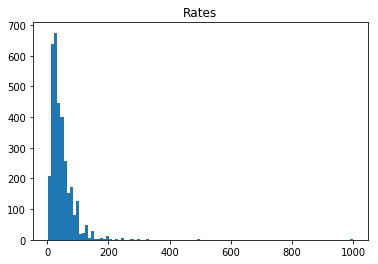

In [26]:
plt.hist(y, bins = 100)
plt.title('Rates')

In [27]:
meany = np.mean(y)
meany

45.484968363965045

In [28]:
std = np.std(y)
std

38.933018238003626

In [29]:
skills_df = df['skills'].str.join('|').str.get_dummies()

In [30]:
sum(skills_df.iloc[0, :])

6

In [31]:
skills_df.head()

,.NET Compact Framework,.NET Framework,.NET Remoting,1ShoppingCart,2D Animation,2D Design,3D Animation,3D Design,3D Modeling,3D Printing,...,insightly,j2 Global Campaigner,jQuery,jQuery UI,memoQ,mobi,phpMyAdmin,soapUI,vCita,webERP
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
km = KModes(n_clusters=15, init='Huang', n_init=11, verbose=1)
clusters = km.fit_predict(skills_df)
print(km.cluster_centroids_)

In [ ]:
kmodes = km.cluster_centroids_
shape = kmodes.shape

In [ ]:
for i in range(shape[0]):
    if sum(kmodes[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no-skills cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i,:]
        for j in skills_df.columns[np.nonzero(cent)]:
            print(j)

In [ ]:
clust_assigned = km.predict(skills_df)

In [ ]:
unique, counts = np.unique(clust_assigned, return_counts=True)
dict(zip(unique, counts))

In [32]:
restrict = copy.deepcopy(skills_df)
for name in restrict.columns:
    if sum(restrict[name]) < 50:
        restrict = restrict.drop([name], axis = 1)

In [33]:
restrict.head()

,Academic Writing,Accounting,Accounts Payable Management,Accounts Receivable Management,Administrative Support,Adobe Creative Suite,Adobe Illustrator,Adobe InDesign,Adobe Photoshop,Advertising,...,Technical Writing,Transcription,Typing,Video Editing,Virtual Assistant,Web Design,Website Development,WordPress,Writing,jQuery
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
km2 = KModes(n_clusters=15, init='Huang', n_init=11, verbose=1)
clusters = km2.fit_predict(restrict)
print(km2.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 364, cost: 11728.0
Run 1, iteration: 2/100, moves: 95, cost: 11714.0
Run 1, iteration: 3/100, moves: 0, cost: 11714.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 765, cost: 10794.0
Run 2, iteration: 2/100, moves: 148, cost: 10794.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 938, cost: 11131.0
Run 3, iteration: 2/100, moves: 249, cost: 11032.0
Run 3, iteration: 3/100, moves: 51, cost: 11032.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 560, cost: 11071.0
Run 4, iteration: 2/100, moves: 164, cost: 11041.0
Run 4, iteration: 3/100, moves: 14, cost: 11041.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 803, cost: 1

In [35]:
kmodes2 = km2.cluster_centroids_
shape2 = kmodes2.shape

In [36]:
for i in range(shape2[0]):
    if sum(kmodes2[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no-skills cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes2[i,:]
        for j in restrict.columns[np.nonzero(cent)]:
            print(j)


cluster 0: 
Blog Writing
Copywriting

cluster 1: 
WordPress

cluster 2: 
no-skills cluster

cluster 3: 
Adobe Illustrator
Adobe InDesign
Adobe Photoshop

cluster 4: 
Graphic Design

cluster 5: 
Microsoft Excel
Microsoft Word

cluster 6: 
Editing
Proofreading

cluster 7: 
Article Writing
Blog Writing
Content Writing

cluster 8: 
Adobe Photoshop

cluster 9: 
Data Entry

cluster 10: 
Customer Service

cluster 11: 
Internet Marketing
Marketing Strategy
Social Media Management
Social Media Marketing

cluster 12: 
Content Writing

cluster 13: 
JavaScript

cluster 14: 
JavaScript
PHP
WordPress


In [37]:
clust_assigned2 = km2.predict(restrict)

In [38]:
unique2, counts2 = np.unique(clust_assigned2, return_counts=True)
dict(zip(unique2, counts2))

{0: 228,
 1: 280,
 2: 1251,
 3: 186,
 4: 108,
 5: 211,
 6: 119,
 7: 166,
 8: 71,
 9: 249,
 10: 129,
 11: 40,
 12: 77,
 13: 135,
 14: 69}

In [39]:
for_box = np.stack((clust_assigned2, y), axis = 1)

In [40]:
box_df = pd.DataFrame(for_box)

In [41]:
box_df.columns = ['cluster', 'rate']

In [42]:
grouped = box_df.groupby('cluster')

(0, 300)

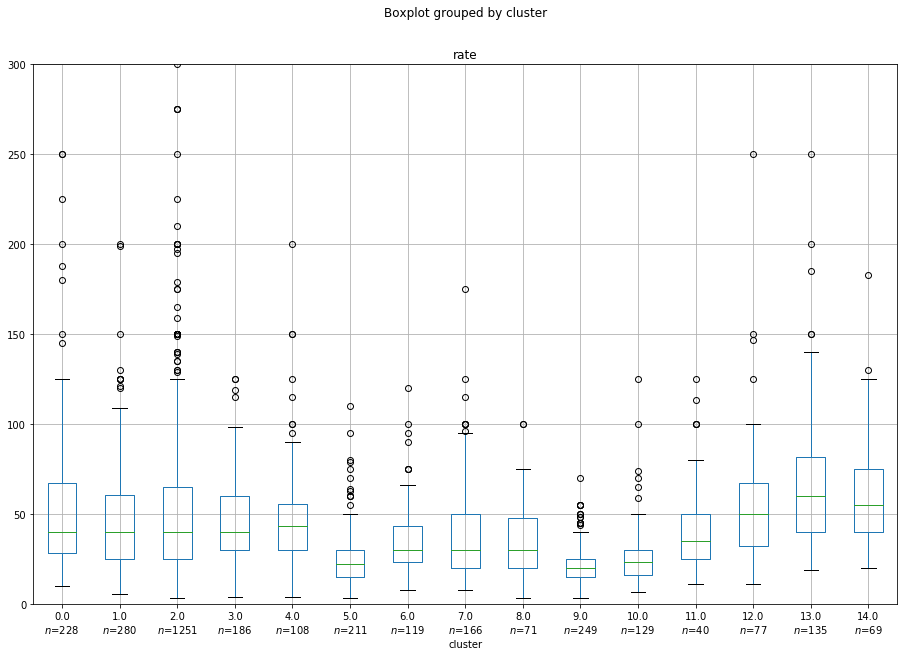

In [58]:
dfg = box_df.groupby('cluster')
counts = [len(v) for k, v in dfg]
total = float(sum(counts))
cases = len(counts)
widths = [c/total for c in counts]  
cax = box_df.boxplot(column='rate', by='cluster', figsize=(15,10))
cax.set_xticklabels(['%s\n$n$=%d'%(k, len(v)) for k, v in dfg])
cax.set_ylim([0,300])

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in grouped:
    df.rate.plot(kind="box", ax=ax, label=label)
plt.show

In [66]:
box_means = dfg.mean()

In [69]:
y_and_cluster_means = pd.merge(box_means, box_df, how='inner', on='cluster', left_on=None, right_on=None,
         left_index=False, right_index=True, sort=False,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [70]:
y_and_cluster_means

,rate_x,rate_y
cluster,,
0.0,55.176360,30.00
0.0,55.176360,79.00
0.0,55.176360,97.00
0.0,55.176360,75.00
0.0,55.176360,50.00
0.0,55.176360,55.00
0.0,55.176360,42.50
0.0,55.176360,25.00
0.0,55.176360,45.00


In [71]:
r2_score(y_and_cluster_means.rate_y, y_and_cluster_means.rate_x)

0.08905224071616857

In [ ]:
X = df.drop(['rate', 'headline'], axis = 1)

In [ ]:
X.skills = X.skills.map(lambda li: len(li))

In [ ]:
X = X.reset_index(drop = True)

In [ ]:
clust = pd.Series(clust_assigned)

In [ ]:
clust.shape

In [ ]:
result = pd.concat([X, clust], axis = 1, sort = False, ignore_index = True)

In [ ]:
result.shape

In [ ]:
result.columns = ['hours', 'jobs', 'skills', 'cluster']

In [ ]:
result.dtypes

In [ ]:
result_dum = pd.get_dummies(result, columns = ['cluster'])

In [ ]:
result_dum.head()

In [ ]:
result_dum.shape

In [ ]:
tr = DecisionTreeRegressor(max_depth = 4)
trmodel = tr.fit(result_dum, y)

In [ ]:
trmodel.score(result_dum, y)

In [ ]:
np.mean(cross_val_score(trmodel, result_dum, y, scoring = 'r2', cv = 4))

In [ ]:
np.sqrt(-1*np.mean(cross_val_score(trmodel, result_dum, y, scoring = 'neg_mean_squared_error', cv = 4)))

In [ ]:
rf = RandomForestRegressor(n_estimators = 500, max_depth = 5)
rfmodel = rf.fit(result_dum, y)

In [ ]:
rfmodel.score(result_dum, y)

In [ ]:
np.mean(cross_val_score(rfmodel, result_dum, y, scoring = 'r2', cv = 4))

In [ ]:
np.sqrt(-1*np.mean(cross_val_score(rfmodel, result_dum, y, scoring = 'neg_mean_squared_error', cv = 4)))

In [ ]:
ada = AdaBoostRegressor(n_estimators = 10000, learning_rate = 0.01)
adamodel = ada.fit(result_dum, y)

In [ ]:
adamodel.score(result_dum, y)

In [ ]:
np.mean(cross_val_score(adamodel, result_dum, y, scoring = 'r2', cv = 4))

In [ ]:
np.sqrt(-1*np.mean(cross_val_score(adamodel, result_dum, y, scoring = 'neg_mean_squared_error', cv = 4)))

In [ ]:
scaler = StandardScaler()
data_std = scaler.fit_transform(X)
data_std = pd.DataFrame(data_std)
data_std.columns = list(X)

In [ ]:
data_std

In [ ]:
max_hours = max(X.hours)
min_hours = min(X.hours)
max_jobs = max(X.jobs)
min_jobs = min(X.jobs)
max_skills = max(X.skills)
min_skills = min(X.skills)

In [ ]:
min_skills

In [ ]:
X.hours = X.hours.map(lambda h: (h - min_hours)/(max_hours - min_hours))

In [ ]:
X.jobs = X.jobs.map(lambda h: (h - min_jobs)/(max_jobs - min_jobs))

In [ ]:
X.skills = X.skills.map(lambda h: (h - min_skills)/(max_skills - min_skills))

In [ ]:
X.head()

In [ ]:
vals = StandardScaler().fit_transform(X)

In [ ]:
parameters = {'metric':('jaccard', 'matching', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 
                        'sokalmichener', 'sokalsneath'), 'n_neighbors':[2, 10, 25, 50, 100]}
# >>> svc = svm.SVC(gamma="scale")
# >>> clf = GridSearchCV(svc, parameters, cv=5)
# >>> clf.fit(iris.data, iris.target)

In [ ]:
neigh = KNeighborsRegressor()
reg = GridSearchCV(neigh, parameters, cv = 4, scoring = 'neg_mean_squared_error')
reg.fit(skills_df, y) 

In [ ]:
bestknn = reg.best_params_

In [ ]:
bestknn

In [ ]:
knnbest = KNeighborsRegressor(n_neighbors = bestknn['n_neighbors'], metric = bestknn['metric'])
np.sqrt(-1*np.mean(cross_val_score(knnbest, restrict, y, scoring = 'neg_mean_squared_error', cv = 4)))

In [ ]:
np.mean(cross_val_score(knnbest, restrict, y, scoring = 'r2', cv = 4))

In [ ]:
neigh.score(restrict, y)

In [ ]:
ridgeReg = Ridge(alpha=1)

In [ ]:
ridgeReg.fit(new_df, y)

In [ ]:
coef = pd.Series(ridgeReg.coef_, new_df.columns).sort_values()

In [ ]:
coef[-15:].plot(kind='bar', title='Model Coefficients')

In [ ]:
cv = 10
m = cross_val_score(Ridge(alpha=100), new_df, y, scoring = 'r2', cv = cv)

In [ ]:
m

In [ ]:
np.mean(m)

In [ ]:
cv = 4
m = cross_val_score(Ridge(alpha=100), result, y, scoring = 'r2', cv = cv)

In [ ]:
m

In [ ]:
np.mean(m)

In [ ]:
names = X.columns

In [ ]:
new_names = new_df.columns

In [ ]:
X = X.values
X = X.astype(float)

In [ ]:
new_X = new_df.values
new_X = new_X.astype(float)

In [ ]:
cv = 4
m = cross_val_score(LinearRegression(), X, y, scoring = 'r2', cv = cv)

In [ ]:
m

In [ ]:
LR = LinearRegression()

In [ ]:
model = LR.fit(new_X, y)

In [ ]:
model.score(new_X,y)

In [ ]:
y_pred = model.predict(new_X)

In [ ]:
min(model.coef_)

In [ ]:
model.intercept_

In [ ]:
d = {'names' : new_names, 'coefs' : model.coef_}

In [ ]:
FI = pd.DataFrame(d)

In [ ]:
sorted_FI = FI.sort_values(by=['coefs'])

In [ ]:
sorted_FI

In [ ]:
np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
r2_score(y, y_pred)

In [ ]:
plt.hist(X[:,0], bins = 20)
plt.title('Hours Worked')

In [ ]:
plt.hist(X[:,1], bins = 20)
plt.title('Jobs Done')

In [ ]:
plt.hist(X[:,2], bins = 20)
plt.title('Number of Skills')

In [ ]:
XT = X.T

In [ ]:
new_XT = new_X.T

In [ ]:
prod = XT @ X

In [ ]:
new_prod = new_XT @ new_X

In [ ]:
inv = np.linalg.inv(prod)

In [ ]:
new_inv = np.linalg.inv(new_prod)

In [ ]:
triple_X = inv @ XT

In [ ]:
theta = triple_X @ y

In [ ]:
preds = [theta @ X[i,:] for i in range(len(y))]

In [ ]:
err = [(y[i] - preds[i])for i in range(len(y))]

In [ ]:
theta2 = theta*1.1

In [ ]:
preds2 = [theta2 @ X[i,:] for i in range(len(y))]
err2 = [(y[i] - preds2[i]) for i in range(len(y))]

In [ ]:
RMSE = (sum([e**2 for e in err])/len(y))**0.5
RMSE2 = (sum([e**2 for e in err2])/len(y))**0.5

In [ ]:
RMSE, RMSE2

In [ ]:
RMSE2 - RMSE

In [ ]:
results = sm.OLS(y, X).fit()

In [ ]:
print(list(zip(list(names),list(theta/100))))

In [ ]:
print(results.summary())